In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
csv = pd.read_csv('./data.csv', delimiter=';')
csv.head()

,acceptability_1,confidence_1,distress_1,acceptability_2,confidence_2,distress_2,acceptability_3,confidence_3,distress_3,acceptability_4,...,age,gender,country,covid,openness,conscientiousness,extraversion,agreeableness,neuroticism,timestamp
0,25,31,100,100,89,100,21,80,100,100,...,44,1,11,-999,NaN,NaN,NaN,NaN,NaN,04/05/2020 14:46
1,70,77,100,85,74,61,85,81,65,76,...,21,2,11,-999,45.0,27.0,21.0,32.0,29.0,06/05/2020 16:22
2,33,67,100,84,59,34,91,73,100,71,...,29,1,11,-999,38.0,36.0,15.0,35.0,20.0,06/05/2020 21:13
3,0,100,75,100,68,100,75,66,100,67,...,28,1,11,-999,37.0,31.0,36.0,37.0,26.0,06/05/2020 21:14
4,0,100,0,100,100,0,0,100,0,56,...,29,1,11,-999,49.0,32.0,25.0,31.0,31.0,06/05/2020 21:15


In [4]:
csv.columns

Index(['acceptability_1', 'confidence_1', 'distress_1', 'acceptability_2',
       'confidence_2', 'distress_2', 'acceptability_3', 'confidence_3',
       'distress_3', 'acceptability_4', 'confidence_4', 'distress_4',
       'acceptability_5', 'confidence_5', 'distress_5', 'acceptability_6',
       'confidence_6', 'distress_6', 'acceptability_7', 'confidence_7',
       'distress_7', 'scenarios_order', 'condition', '1_oxford_1',
       '1_oxford_2', '1_oxford_3', '1_oxford_4', '1_oxford_5', '1_oxford_6',
       '1_oxford_7', '1_oxford_8', '1_oxford_9', 'oxford_order', 'age',
       'gender', 'country', 'covid', 'openness', 'conscientiousness',
       'extraversion', 'agreeableness', 'neuroticism', 'timestamp'],
      dtype='object')

In [40]:
bar_bins = np.arange(-1, 100 + 5, 5)
dfs = []
for i in range(0, 5):
    col = f'acceptability_{i + 1}'
    bars = csv.groupby(pd.cut(csv[col], 20)).count()[col]
    df = pd.DataFrame({
        'x': bar_bins[:-1],
        'y': bars.values
    })
    dfs.append(df)
    df.to_csv(f'./out/{col}.csv')

In [44]:
csv.groupby(pd.cut(csv['acceptability_1'], 20)).count()['acceptability_1']

acceptability_1
(-0.1, 5.0]      3816
(5.0, 10.0]       305
(10.0, 15.0]      523
(15.0, 20.0]      709
(20.0, 25.0]      991
(25.0, 30.0]      772
(30.0, 35.0]      572
(35.0, 40.0]      384
(40.0, 45.0]      263
(45.0, 50.0]      399
(50.0, 55.0]      352
(55.0, 60.0]      474
(60.0, 65.0]      615
(65.0, 70.0]      751
(70.0, 75.0]      888
(75.0, 80.0]      750
(80.0, 85.0]      501
(85.0, 90.0]      261
(90.0, 95.0]      141
(95.0, 100.0]    1953
Name: acceptability_1, dtype: int64

<AxesSubplot:>

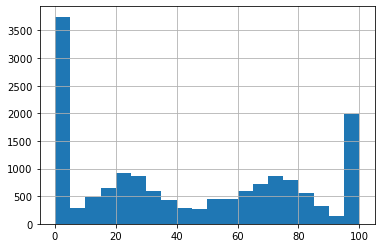

In [38]:
csv['acceptability_1'].hist(bins=20)

In [6]:
# impartial beneficence (IB)
columns_ib = ['1_oxford_1','1_oxford_2', '1_oxford_3', '1_oxford_4', '1_oxford_5']

# instrumental harm (IH)
columns_ih = ['1_oxford_6','1_oxford_7', '1_oxford_8', '1_oxford_9']

IB = csv[columns_ib].apply(np.sum, axis=1)
IH = csv[columns_ih].apply(np.sum, axis=1)

zIB = stats.zscore(IB)
zIH = stats.zscore(IH)

u_ib = np.unique(list(zip(IB, zIB)), axis=0)
u_ih = np.unique(list(zip(IH, zIH)), axis=0)

min_zIB = np.min(zIB)
max_zIB = np.max(zIB)
min_zIH = np.min(zIH)
max_zIH = np.max(zIH)

x_scale = (0, 100)
y_scale = (0, 100)

In [7]:
# compute range of values for likert scale 7

x_questions = 5
x_values = np.arange(1 * x_questions, 7 * x_questions, 1)

y_questions = 4
y_values = np.arange(1 * y_questions, 7 * y_questions, 1)

In [8]:
r = []
l = np.zeros([35, 28, 2])
for x in x_values:
    for y in y_values:
        _ib = u_ib[x - 5][1]
        _ih = u_ih[y - 4][1]
        i = np.interp(_ib, (min_zIB, max_zIB), x_scale)
        j = np.interp(_ih, (min_zIH, max_zIH), y_scale)
        l[x][y][0] = round(i, 2)
        l[x][y][1] = round(j, 2)
        r.append([x, y, round(i, 2), round(j, 2)])

In [9]:
scatter = pd.DataFrame(r, columns=['ib', 'ih', 'x', 'y'])
scatter

,ib,ih,x,y
0,5,4,0.00,0.00
1,5,5,0.00,4.17
2,5,6,0.00,8.33
3,5,7,0.00,12.50
4,5,8,0.00,16.67
...,...,...,...,...
715,34,23,96.67,79.17
716,34,24,96.67,83.33
717,34,25,96.67,87.50
718,34,26,96.67,91.67


In [10]:
scatter.to_csv('./out/scatter.csv')

In [11]:
distress = pd.DataFrame({
    '6': csv['distress_6'],
    '7': csv['distress_7'],
}).replace(-999, 0)
distress = distress.sum(axis=1)

confidence = pd.DataFrame({
    '6': csv['confidence_6'],
    '7': csv['confidence_7'],
}).replace(-999, 0)
confidence = confidence.sum(axis=1)

In [12]:
df = pd.DataFrame({
    'zIB': zIB,
    'zIH': zIH,
    'impersonal': csv['acceptability_6'],
    'personal': csv['acceptability_7'],
    'confidence': confidence,
    'distress': distress,
})
df = df.replace(-999, np.nan)
df

,zIB,zIH,impersonal,personal,confidence,distress
0,-1.164010,-0.872976,NaN,0.0,100,100
1,-0.048302,0.639784,69.0,NaN,66,100
2,0.111085,0.828879,NaN,74.0,75,98
3,1.226793,-0.494786,NaN,0.0,100,100
4,-2.439105,-0.683881,NaN,50.0,0,100
...,...,...,...,...,...,...
15415,-0.367076,0.261594,NaN,30.0,57,96
15416,-1.164010,-0.494786,NaN,8.0,100,50
15417,0.908019,-0.305691,NaN,100.0,62,97
15418,1.864341,2.908923,NaN,100.0,100,100


In [13]:
bin_size = 0.5
bins = np.arange(-2, 2 + bin_size, bin_size)

In [14]:
ma_imp = np.zeros([len(bins) - 1, len(bins) - 1])
ma_per = np.zeros([len(bins) - 1, len(bins) - 1])

ma_dis = np.zeros([len(bins) - 1, len(bins) - 1])
ma_conf = np.zeros([len(bins) - 1, len(bins) - 1])

In [15]:
for i in range(len(bins) - 1):
    for j in range(len(bins) - 1):
        data_in_bin = df.loc[
            (df['zIH'] >= bins[i]) & (df['zIH'] < bins[i + 1]) &
            (df['zIB'] >= bins[j]) & (df['zIB'] < bins[j + 1]) 
        ]
        ma_imp[i][j] = round(np.nanmean(data_in_bin['impersonal']), 2)
        ma_per[i][j] = round(np.nanmean(data_in_bin['personal']), 2)
        ma_dis[i][j] = round(np.nanmean(data_in_bin['distress']), 2)
        ma_conf[i][j] = round(np.nanmean(data_in_bin['confidence']), 2)

In [16]:
cm = LinearSegmentedColormap.from_list('custom', [
 '#ee5d52', '#F28178', '#F5A49D', '#F9C6C3', '#FCE5E3',
 "#FFFFFF", "#E9F5FC", "#D3EBF8", "#AFDBF3", "#8CCBED", "#68BBE8"
], N=11)

In [17]:
colors = np.array([
    "#2ca25f",
    "#33A564",
    "#39A869",
    "#40AB6E",
    "#46AE73",
    "#4DB178",
    "#54B37D",
    "#5AB682",
    "#61B987",
    "#67BC8C",
    "#6EBF91",
    "#75C296",
    "#7BC59B",
    "#82C8A0",
    "#88CBA5",
    "#8FCEAA",
    "#95D1AF",
    "#9CD3B4",
    "#A3D6B9",
    "#A9D9BE",
    "#B0DCC3",
    "#B6DFC8",
    "#BDE2CD",
    "#C4E5D2",
    "#CAE8D7",
    "#D1EBDC",
    "#D7EEE1",
    "#DEF0E6",
    "#E5F3EB",
    "#EBF6F0",
    "#F2F9F5",
    "#F8FCFA",
    "#FFFFFF",
    "#FEF9F8",
    "#FDF3F2",
    "#FCEDEB",
    "#FBE8E5",
    "#FAE2DE",
    "#FADCD8",
    "#F9D6D1",
    "#F8D0CA",
    "#F7CAC4",
    "#F6C5BD",
    "#F5BFB7",
    "#F4B9B0",
    "#F3B3A9",
    "#F2ADA3",
    "#F1A79C",
    "#F1A296",
    "#F09C8F",
    "#EF9689",
    "#EE9082",
    "#ED8A7B",
    "#EC8475",
    "#EB7F6E",
    "#EA7968",
    "#E97361",
    "#E86D5A",
    "#E86754",
    "#E7614D",
    "#E65C47",
    "#E55640",
    "#E4503A",
    "#E34A33"
])

In [18]:
cm = LinearSegmentedColormap.from_list('custom', np.flip(colors), N=len(colors))

In [19]:
def heatmap(data, vmin=0, vmax=100, title=''):
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap=cm, vmin=vmin, vmax=vmax)
    ax.set_xlim(-0.5,7.5)
    ax.set_ylim(-0.5,7.5)
    ax.set_title(title)
    plt.show()

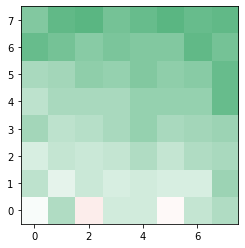

In [20]:
heatmap(ma_imp)

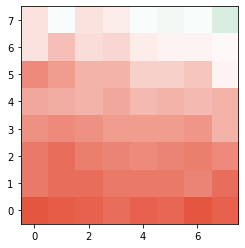

In [21]:
heatmap(ma_per)

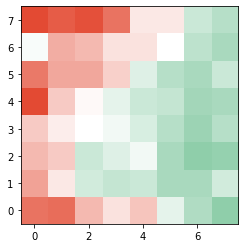

In [22]:
heatmap(ma_dis, vmin=80, vmax=100)

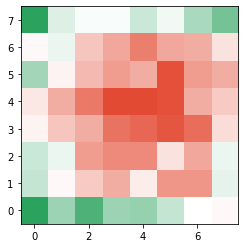

In [23]:
heatmap(ma_conf, vmin=60, vmax=80)

In [24]:
pd.DataFrame(ma_imp).to_csv('./out/impersonal_matrix.csv')
pd.DataFrame(ma_per).to_csv('./out/personal_matrix.csv')
pd.DataFrame(ma_dis).to_csv('./out/distress_matrix.csv')
pd.DataFrame(ma_conf).to_csv('./out/confidence_matrix.csv')